### In this jupyter notebook, we demonstrate how to sample data by a biased selection probability controled by $r$: 
\begin{equation} \label{bias2}
    P_i=|r|^{-5  |\, \tilde{y}_i \, - \, sign(r) \tilde{V}_i \, |}
\end{equation}

### More details of the explaination about this equation can be found in the paper 
> [Out of Distribution Generalization for Problems in Mechanics](link forthcoming)

### The data used for this demo can be downloaded from
> [Mechanical MNIST - Equibiaxial Extension](https://open.bu.edu/handle/2144/39428)

## Example 1: (implicit) Spurious feature : sum of modulus

### 1. We first load the input and the output data downloaded from the link above. The loaded data will be used as the sampling pool that data will be selected from.  And we rescale the pixel values b of orginal MNIST to be the modulus value E of each block by the equation below:
\begin{equation} \label{eq:transform}
E = \frac{b}{255.0} * (100-1) + 1
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p = '/projectnb/slme/lxyuan/fullField/data/'  ##this should be the path where you save the downloaded data
#load the input data and rescale it to 1~100
m_train_input = np.loadtxt('%sMNIST_input_files/mnist_img_train.txt'%p)/255.0*(100-1)+1
m_train_psi = np.loadtxt('%sFEA_psi_results_equi/summary_psi_train_all.txt'%p)[:,-1].reshape(-1,1)  

### 2. Calculate the mean and the standar deviation of the spuriou features and the output property(the change in strain energy). 

\begin{equation}\label{fV}
    \tilde{V}_i = \frac{V_i \, - \, V_{mean}}{V_{std}} \qquad \qquad \mathrm{and} \qquad \qquad \tilde{y}_i = \frac{y_i \, - \, y_{mean}}{y_{std}} 
\end{equation}

### In this example the $V_i$ of each data $i$ is the sum of modulus of each block domain $V_i=\sum_{j=1}^{784}E_j$.

In [3]:
# mean of the spurious feature (sum of modulus)
vm = m_train_input.reshape(-1,28*28).sum(1).mean()
# standard deviation of the spurious feature(sum of modulus)
vs = m_train_input.reshape(-1,28*28).sum(1).std()
# mean of the output label (change in strain energy)
ym = m_train_psi.mean()
# standard deviation of the output label (change in strain energy)
ys = m_train_psi.std()

print('mean of the spurious feature (sum of modulus):',round(vm,2))
print('standard deviation of the spurious feature(sum of modulus):',round(vs,2))
print('mean of the output label (change in strain energy):',round(ym,2))
print('standard deviation of the output label (change in strain energy): ', round(ys,2))

mean of the spurious feature (sum of modulus): 10925.34
standard deviation of the spurious feature(sum of modulus): 3360.66
mean of the output label (change in strain energy): 567.52
standard deviation of the output label (change in strain energy):  47.35


### the function to normalize data

In [4]:
def calculate_fv(X, vm = round(vm, 2), vs =round(vs, 2)):
    V = X.reshape(-1,28*28).sum(1)
    fv = (V - vm)/vs
    return fv

def calculate_fy(y, ym=round(ym, 2),ys=round(ys, 2)):
    temp = y.reshape(-1)
    fy = (temp - ym)/ys
    return fy

#### Example 1.1 Sampling data by the selection probability for $r=15$

In [5]:
r=15
# calculate the normalize spurious feature and the quantity of interest of the sampling pool
images = m_train_input
labels = m_train_psi
fv = calculate_fv(images)
fy = calculate_fy(labels)

#calculate the selection probability of each data in the sampling pool
p = np.power(np.abs(r), -np.abs(fy - np.sign(r)*fv)*5)

#select 2000 data without replacement
k = np.random.choice(len(images), size = 2000, replace=False, p = p/sum(p))
selected_images = images[k]
selected_labels = labels[k]

#### Visualize the relationship of the spurious feature and the  quantity of interest for the selected data

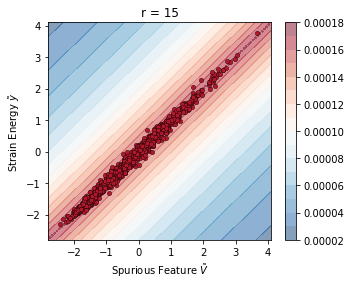

In [6]:
x = np.linspace(-2.8, 4.1, 100)
y = np.linspace(-2.8, 4.1, 100)
xx, yy = np.meshgrid(x, y)

fig,ax = plt.subplots(1,figsize = (5,4))
# contour plot the selection probability
z = np.power(np.abs(r), -np.abs(xx- np.sign(r)*yy)/10)
z = z/z.sum()
c1 = ax.contourf(x, y, z, levels=14, cmap="RdBu_r", alpha = 0.5)

# scatter plot of the selected data
fv = calculate_fv(selected_images)
fy = calculate_fy(selected_labels)
sns.scatterplot(ax=ax,x = fv, y = fy,s=20, 
                    color = '#b2182b', edgecolor = 'Black')
ax.set_title('r = %s'%r)
ax.set_xlabel(r'Spurious Feature $\tilde{V}$')
ax.set_ylabel(r'Strain Energy $\tilde{y}$')
fig.colorbar(c1,ax = ax)
fig.show()  

#### Example 1.2 Sampling data by the selection probability for  $r=-15$

In [7]:
r=-15
# calculate the normalize spurious feature and the quantity of interest of the sampling pool
images = m_train_input
labels = m_train_psi
fv = calculate_fv(images)
fy = calculate_fy(labels)

#calculate the selection probability of each data in the sampling pool
p = np.power(np.abs(r), -np.abs(fy - np.sign(r)*fv)*5)

#select 2000 data without replacement
k = np.random.choice(len(images), size = 2000, replace=False, p = p/sum(p))
selected_images = images[k]
selected_labels = labels[k]

#### Visualize the relationship of the spurious feature and the quantity of interest for the selected data

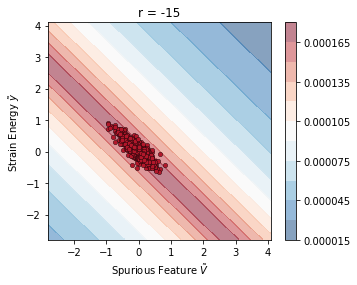

In [8]:
x = np.linspace(-2.8, 4.1, 100)
y = np.linspace(-2.8, 4.1, 100)
xx, yy = np.meshgrid(x, y)

fig,ax = plt.subplots(1,figsize = (5,4))
# contour plot the selection probability
z = np.power(np.abs(r), -np.abs(xx- np.sign(r)*yy)/10)
z = z/z.sum()
c1 = ax.contourf(x, y, z, levels=14, cmap="RdBu_r", alpha = 0.5)

# scatter plot of the selected data
fv = calculate_fv(selected_images)
fy = calculate_fy(selected_labels)
sns.scatterplot(ax=ax,x = fv, y = fy,s=20, 
                    color = '#b2182b', edgecolor = 'Black')
ax.set_title('r = %s'%r)
ax.set_xlabel(r'Spurious Feature $\tilde{V}$')
ax.set_ylabel(r'Strain Energy $\tilde{y}$')
fig.colorbar(c1,ax = ax)
fig.show()  

# ------------------------------------------------------------------------------------------------------- #

## Example 2: (implicit) Spurious feature : sum of modulus of every other blocks(i.e, the sum of modulus for the blocks in even index 0,2,4,....784)

In [9]:
# mean of the spurious feature (sum of modulus)
vm = m_train_input.reshape(-1,28*28)[:,::2].sum(1).mean()
# standard deviation of the spurious feature(sum of modulus)
vs = m_train_input.reshape(-1,28*28)[:,::2].sum(1).std()
# mean of the output label (change in strain energy)
ym = m_train_psi.mean()
# standard deviation of the output label (change in strain energy)
ys = m_train_psi.std()

print('mean of the spurious feature (sum of modulus):',round(vm,2))
print('standard deviation of the spurious feature(sum of modulus):',round(vs,2))
print('mean of the output label (change in strain energy):',round(ym,2))
print('standard deviation of the output label (change in strain energy): ', round(ys,2))

mean of the spurious feature (sum of modulus): 5459.96
standard deviation of the spurious feature(sum of modulus): 1684.97
mean of the output label (change in strain energy): 567.52
standard deviation of the output label (change in strain energy):  47.35


### the function to normalize data

In [10]:
def calculate_fv(X, vm = round(vm, 2), vs =round(vs, 2)):
    V = X.reshape(-1,28*28)[:,::2].sum(1)
    fv = (V - vm)/vs
    return fv

def calculate_fy(y, ym=round(ym, 2),ys=round(ys, 2)):
    temp = y.reshape(-1)
    fy = (temp - ym)/ys
    return fy

#### Example 2.1 Sampling data by the selection probability for $r=10$

In [11]:
r=10
# calculate the normalize spurious feature and the quantity of interest of the sampling pool
images = m_train_input
labels = m_train_psi
fv = calculate_fv(images)
fy = calculate_fy(labels)

#calculate the selection probability of each data in the sampling pool
p = np.power(np.abs(r), -np.abs(fy - np.sign(r)*fv)*5)

#select 2000 data without replacement
k = np.random.choice(len(images), size = 2000, replace=False, p = p/sum(p))
selected_images = images[k]
selected_labels = labels[k]

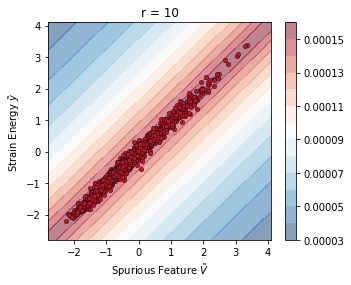

In [12]:
x = np.linspace(-2.8, 4.1, 100)
y = np.linspace(-2.8, 4.1, 100)
xx, yy = np.meshgrid(x, y)

fig,ax = plt.subplots(1,figsize = (5,4))
# contour plot the selection probability
z = np.power(np.abs(r), -np.abs(xx- np.sign(r)*yy)/10)
z = z/z.sum()
c1 = ax.contourf(x, y, z, levels=14, cmap="RdBu_r", alpha = 0.5)

# scatter plot of the selected data
fv = calculate_fv(selected_images)
fy = calculate_fy(selected_labels)
sns.scatterplot(ax=ax,x = fv, y = fy,s=20, 
                    color = '#b2182b', edgecolor = 'Black')
ax.set_title('r = %s'%r)
ax.set_xlabel(r'Spurious Feature $\tilde{V}$')
ax.set_ylabel(r'Strain Energy $\tilde{y}$')
fig.colorbar(c1,ax = ax)
fig.show()  

#### Example 2.1 Sampling data by the selection probability for  $r= - 10$

In [13]:
r=-10
# calculate the normalize spurious feature and the quantity of interest of the sampling pool
images = m_train_input
labels = m_train_psi
fv = calculate_fv(images)
fy = calculate_fy(labels)

#calculate the selection probability of each data in the sampling pool
p = np.power(np.abs(r), -np.abs(fy - np.sign(r)*fv)*5)

#select 2000 data without replacement
k = np.random.choice(len(images), size = 2000, replace=False, p = p/sum(p))
selected_images = images[k]
selected_labels = labels[k]

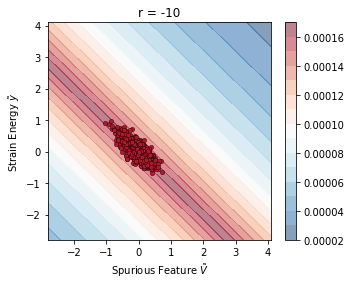

In [14]:
x = np.linspace(-2.8, 4.1, 100)
y = np.linspace(-2.8, 4.1, 100)
xx, yy = np.meshgrid(x, y)

fig,ax = plt.subplots(1,figsize = (5,4))
# contour plot the selection probability
z = np.power(np.abs(r), -np.abs(xx- np.sign(r)*yy)/10)
z = z/z.sum()
c1 = ax.contourf(x, y, z, levels=14, cmap="RdBu_r", alpha = 0.5)

# scatter plot of the selected data
fv = calculate_fv(selected_images)
fy = calculate_fy(selected_labels)
sns.scatterplot(ax=ax,x = fv, y = fy,s=20, 
                    color = '#b2182b', edgecolor = 'Black')
ax.set_title('r = %s'%r)
ax.set_xlabel(r'Spurious Feature $\tilde{V}$')
ax.set_ylabel(r'Strain Energy $\tilde{y}$')
fig.colorbar(c1,ax = ax)
fig.show()  